# Pymaceuticals Inc. SCC Synopsis
---

### Dr. Brown 

- It brings me difficulty to report that the results of our testing are mixed. On one hand, Ramicane was the sole rival drug to offer a lower average tumor size at the study's conclusion, on direct comparison testing. On the other hand, some of our subjects had their tumors rebound after roughly four weeks on Capomulin. We can rule out increased weight as a cause of this, as our fatter mice generally had larger tumors. I recommend that we continue to test Capomulin and focus on tumor size rebound in further comparisons. We cannot use this study to conclusively demonstrate the effectiveness of Capomulin.

In [1]:
# Import our modules
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Identify and read subject profiles and experiment results
micepath = "data/Mouse_metadata.csv"
studypath = "data/Study_results.csv"
micedata = pd.read_csv(micepath)
research = pd.read_csv(studypath)

# Combine into one DataFrame and display it
scc=pd.merge(micedata,research)
scc.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Our scientists mistakenly duplicated a subject in the metadata, so count all individual specimens
micenum=scc["Mouse ID"].unique()
print(len(micenum))

249


In [3]:
# Identify the duplicate's positions in the DataFrame using Mouse ID and Timepoint
copied=scc[scc.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]
print(copied)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
copied.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [5]:
# Correct the DataFrame by deleting the duplicates.
fixedmice=scc[scc["Mouse ID"]!="g989"]
print(fixedmice)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [6]:
# How many mice do we actually have?
specimens=fixedmice["Mouse ID"].unique()
print(len(specimens))

248


## Summary Statistics

In [7]:
# Get some summary stats of our tumor volumes
fixedmice[["Tumor Volume (mm3)","Drug Regimen"]].describe()


,Tumor Volume (mm3)
count,1880.000000
mean,50.435293
std,8.914197
min,22.050126
25%,45.000000
50%,48.933454
75%,56.324075
max,78.567014


In [8]:
#Retrieve means, medians, variances, standard deviations, and standard errors of tumor volumes for all drug regimens
fixedmean=fixedmice.groupby ("Drug Regimen")["Tumor Volume (mm3)"].mean()
fixedmedian=fixedmice.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
fixedvar=fixedmice.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
fixedstdev=fixedmice.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
fixedsem=fixedmice.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

In [9]:
# Assemble the resulting series into one summary DataFrame.
fixedstats=pd.DataFrame({"Mean Tumor Volume":fixedmean,"Median Tumor Volume":fixedmedian,"Tumor Volume Variance":fixedvar,"Tumor Volume Standard Deviation":fixedstdev,"Tumor Volume Standard Error":fixedsem})
fixedstats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# We can also use aggregation to make summary stats. A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
fixedagg=fixedmice.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var", "std","sem"]})
fixedagg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

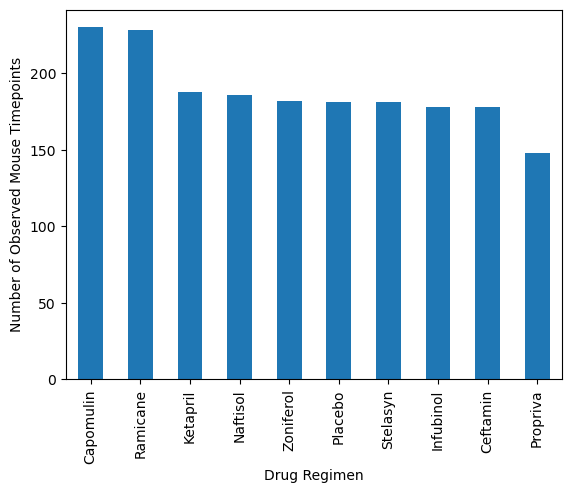

In [11]:
# Use pandas to make a bar graph showing the total number of rows (Mouse ID/Timepoints) for all drug regimens.
drugs=fixedmice["Drug Regimen"].value_counts()
drugs.plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

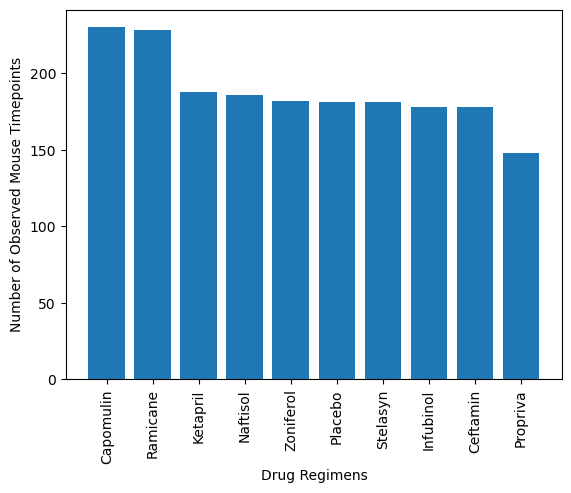

In [12]:
# Use pyplot to make the same graph.
plt.bar(x=drugs.index, height=drugs.values,align="center")
plt.xticks(rotation=90)
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

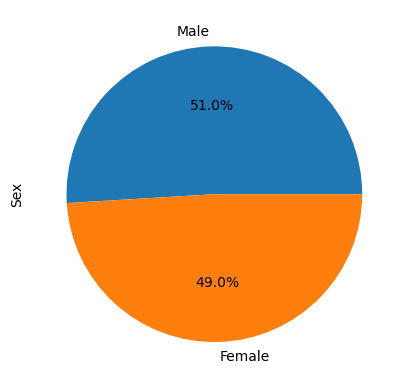

In [13]:
# Use pandas to make a pie chart on the proportion of male versus female specimens
sexes=fixedmice["Sex"].value_counts()
sexes.plot.pie(autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

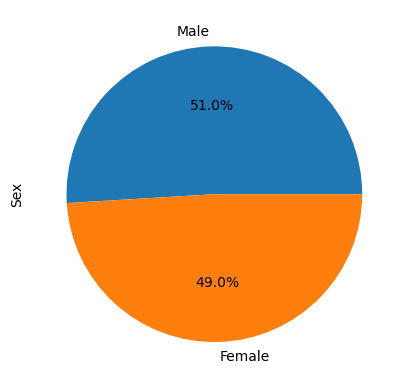

In [14]:
# Use pyplot to make the same graph
plt.pie(sexes.values, labels=sexes.index, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume for Capomulin, Ramicane, Infubinol, and Ceftamin

# Find the final timepoint for all specimens, then merge with the fixed DataFrame to compare tumor volumes
endtime=fixedmice.groupby("Mouse ID")[["Timepoint"]].max().reset_index()
endmerge=pd.merge(endtime,fixedmice,on=["Mouse ID","Timepoint"],how="left")
endmerge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [16]:
# List our treatments for a for loop
fourregs=["Capomulin","Ramicane","Infubinol","Ceftamin"]
# Create empty list to fill with tumor volume data
tumorvol=[]
# Calculate the IQR and quantitatively determine if outliers exist 
for drug in fourregs:
    growths=endmerge.loc[endmerge["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumorvol.append(growths)    
    q1=growths.quantile(.25)
    q3=growths.quantile(.75)
    iqr=q3-q1
    lowerbound=q1-(iqr*1.5)
    upperbound=q3+(iqr*1.5) 
    outliers=growths.loc[(growths<lowerbound)|(growths>upperbound)]
    # Determine outliers using upper and lower bounds
    print(f"{drug}'s possible outliers: {outliers}")

Capomulin's possible outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's possible outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's possible outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's possible outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


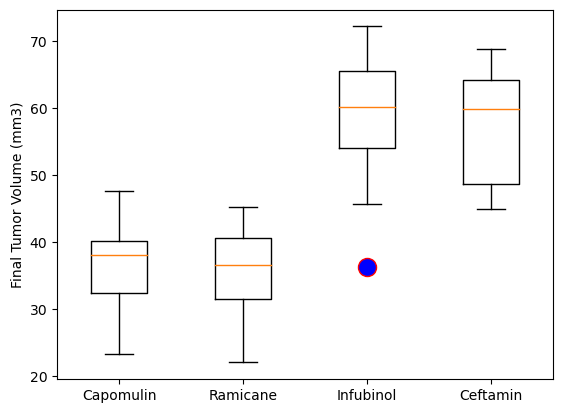

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each of these four groups
boxy=dict(marker='o',markerfacecolor='b',markersize=13,linestyle='none',markeredgecolor='r')
plt.boxplot(tumorvol,labels=fourregs,flierprops=boxy)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

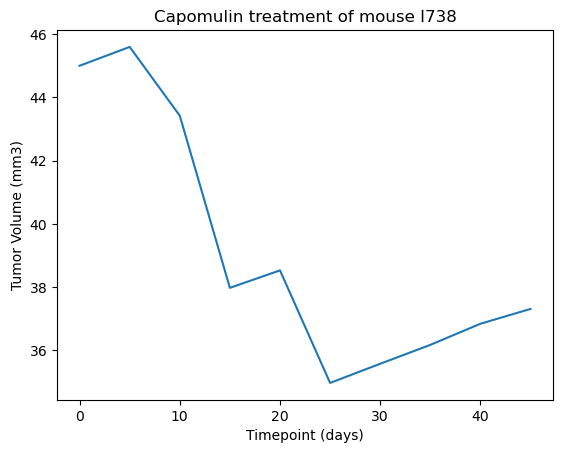

In [18]:
# Make a line plot of tumor volume vs. time point for one Capomulin treated specimen
capomulin=fixedmice.loc[fixedmice["Mouse ID"]=="i738"][["Timepoint","Tumor Volume (mm3)"]]
plt.plot(capomulin["Timepoint"],capomulin["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse I738")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

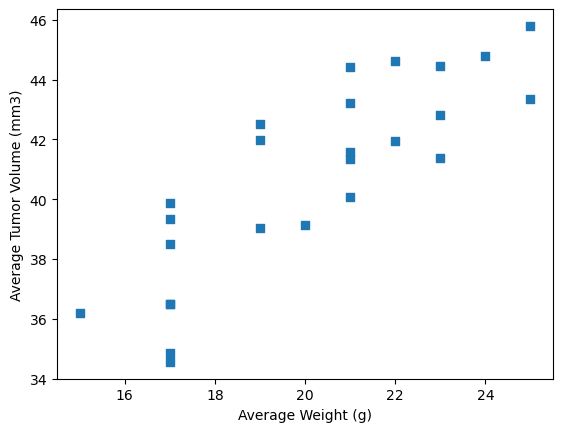

In [19]:
# Make a scatter plot of mouse weight vs. average observed tumor volume for all Capomulin subjects
filtered=fixedmice[fixedmice["Drug Regimen"]=="Capomulin"]
capvolmean=filtered.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
capweightmean=filtered.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(capweightmean,capvolmean,marker='s')
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show

## Correlation and Regression

The correlation between mouse weight and average tumor volume in the Capomulin group is 0.7088568047708723


<function matplotlib.pyplot.show(close=None, block=None)>

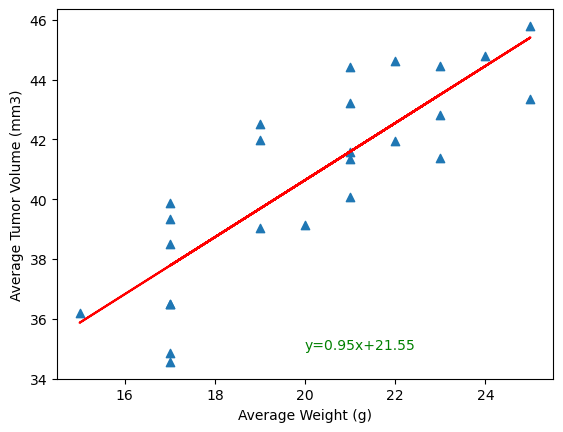

In [20]:
# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen; add an annotation if you want!
(slope, intercept, rvalue, pvalue, stdder) = st.linregress(capweightmean, capvolmean)
regression=intercept+slope*(capweightmean)
line="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(capweightmean, capvolmean, marker="^")
plt.plot(capweightmean, regression, "r-")
plt.annotate(f"y={round(slope,2)}x+{round(intercept,2)}",(20,35),color="green")
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and average tumor volume in the Capomulin group is {rvalue**2}")
plt.show